In [19]:
# imports tensorflow dependency as tf and imports matplotlib to show images
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# loads mnist dataset into the mnist variable from the keras datasets
mnist = tf.keras.datasets.mnist

# x_train are images and y_train are the labels 
# x_test and y_tests are the test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# assigns values to images between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255


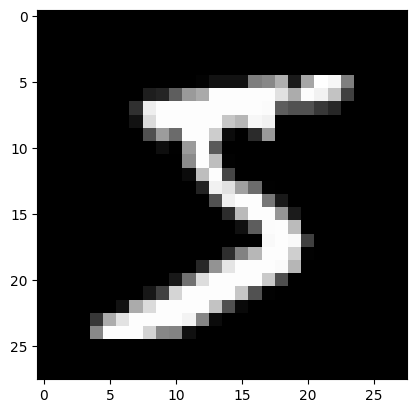

In [32]:
# shows that the dataset has 60k images each 28 x 28 pixels

x_train.shape

# shows the first image on the dataset
image_one = x_train[0]
plt.imshow(image_one, cmap='gray')

In [33]:
# the model always expects the images in a list, even if you only want to see one image

x_train[:1].shape

(1, 28, 28)

In [26]:
image_one

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
# build the neural network using a sequential api

model = tf.keras.models.Sequential([

    # the first layer of the modle flattens / reshapes the input data

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # adds a dense layer, fully connected; each neuron in this layer is connected to every neuron from the first layer. it will have 128 neurons and 'relu' introduces non-linearity into the model
    # 'relu' is an activation function that determines how neurons in the layer respond to a given input

    tf.keras.layers.Dense(128, activation='relu'),

    # adds a dropout layer which is a regularization technique that helps prevent overfitting by randomly dropping a fraction (20%) of neurons during the training process
    # this forces the network to learn more robust features and thereby reducing the risk of overfitting

    tf.keras.layers.Dropout(0.2),

    # the last layer is another dense layer having 10 neurons (for the 10 possible digits [0, 1, 2, ..., 9, 10]), often used for the output layer during classification tasks
    # since no activation function is specified, it uses a linear activation function by default, which is good for multi-class classification (raw values as outputs representing probabilities)

    tf.keras.layers.Dense(10)
])

In [40]:
# gives the probability of what digit it most likely is (the current NN with no training sees the image (1) as a most likely a 9 (highest logit score of .7859))

model(x_train[:1])
prediction = model(x_train[:1])

In [42]:
# the tensorflow softmax function converts the logits we got from the previous code to probabilities for each class (each digit)
# the NN still thinks the image is a 9 with the highest probability of 15.468%

tf.nn.softmax(prediction).numpy()

array([[0.07058779, 0.15506579, 0.03246449, 0.14608851, 0.09306766,
        0.08699702, 0.05680012, 0.11769728, 0.08654898, 0.15468235]],
      dtype=float32)

In [44]:
# the SpareCategoricalCrossentropy loss takes the vector ofl igts and a 'True' index and returns a scalar loss for each example

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [46]:
# an untrained model can only randomly guess what the number could be so the initial loss should be close to ~2.3

loss_fn(y_train[:1], prediction).numpy()

2.4418812

In [48]:
# adjusting model parameters

model.compile(
    optimizer='adam', 
    loss=loss_fn, 
    metrics=['accuracy'])

In [49]:
# the Model.fit minimizes loss after adjusting model parameters

model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 970us/step - loss: 0.2995 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.1430 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.1080 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.0733 - accuracy: 0.9772


In [52]:
# shows that the training set was 10000 images

x_test.shape

(10000, 28, 28)

In [50]:
# shows that even on the training set (images it hasn't seen), the NN's accuracy is ~97.479%

model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0786 - accuracy: 0.9748 - 277ms/epoch - 884us/step


[0.07862056791782379, 0.9747999906539917]

In [54]:
# added 1 data set

ValueError: in user code:

    File "/Users/luna/Desktop/Projects/mnist-classification/tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/Users/luna/Desktop/Projects/mnist-classification/tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/luna/Desktop/Projects/mnist-classification/tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/Users/luna/Desktop/Projects/mnist-classification/tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/Users/luna/Desktop/Projects/mnist-classification/tensorflow/venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/luna/Desktop/Projects/mnist-classification/tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 10)
